<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
   <strong> packages necessaires</strong>
</h1>

In [39]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb
from xgboost import XGBClassifier

<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
   <strong>Importation des données via kaggle</strong>
</h1>
 

In [3]:
data_set = 'https://www.kaggle.com/datasets/mos3santos/deteco-de-fraude-de-carto-de-crdito'
od.download(data_set)

Skipping, found downloaded files in ".\deteco-de-fraude-de-carto-de-crdito" (use force=True to force download)


In [4]:
data_dir = '.\deteco-de-fraude-de-carto-de-crdito'
file_path = os.path.join(data_dir, "creditcard.csv")
print("Chemin utilisé :", file_path)  # vérification
creditcard = pd.read_csv(file_path)

Chemin utilisé : .\deteco-de-fraude-de-carto-de-crdito\creditcard.csv


<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
   <strong>Aperçu du dataset </strong>
</h1>
 

In [22]:
display(creditcard.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
   <strong>Informations générales </strong>
</h1>

In [40]:
print(creditcard.info())


Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time           284807 non-null  float64
 1   V1             284807 non-null  float64
 2   V2             284807 non-null  float64
 3   V3             284807 non-null  float64
 4   V4             284807 non-null  float64
 5   V5             284807 non-null  float64
 6   V6             284807 non-null  float64
 7   V7             284807 non-null  float64
 8   V8             284807 non-null  float64
 9   V9             284807 non-null  float64
 10  V10            284807 non-null  float64
 11  V11            284807 non-null  float64
 12  V12            284807 non-null  float64
 13  V13            284807 non-null  float64
 14  V14            284807 non-null  float64
 15  V15            284807 non-null  float64
 16  V16            284807 non-null  float64
 17  V17

<h3>Résumé du dataset</h3>
<p>Le dataset contient <b>284 807 transactions</b>, ce qui est un volume important, adapté à l’analyse de fraude.</p>

<p>Il comporte <b>31 colonnes</b> :</p>
<ul>
  <li><b>Time</b> — temps écoulé depuis le début de l’enregistrement</li>
  <li><b>Amount</b> — montant de la transaction</li>
  <li><b>Class</b> — <code>0</code> = non-fraude, <code>1</code> = fraude</li>
  <li><b>V1 à V28</b> — variables transformées par PCA (anonymisées pour confidentialité)</li>
</ul>

<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
   <strong> Statistiques descriptives </strong>
</h1>

In [7]:
print("\nStatistiques descriptives :")
display(creditcard.describe())


Statistiques descriptives :


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
   <strong>  Valeurs manquantes par colonne</strong>
</h1>

In [8]:
val_nul = creditcard.isnull().sum()
missing_creditcard = pd.DataFrame({
    'Colonne': val_nul.index,
    'Valeurs manquantes': val_nul.values
})
print("\nValeurs manquantes par colonne :")
print(missing_creditcard)


Valeurs manquantes par colonne :
   Colonne  Valeurs manquantes
0     Time                   0
1       V1                   0
2       V2                   0
3       V3                   0
4       V4                   0
5       V5                   0
6       V6                   0
7       V7                   0
8       V8                   0
9       V9                   0
10     V10                   0
11     V11                   0
12     V12                   0
13     V13                   0
14     V14                   0
15     V15                   0
16     V16                   0
17     V17                   0
18     V18                   0
19     V19                   0
20     V20                   0
21     V21                   0
22     V22                   0
23     V23                   0
24     V24                   0
25     V25                   0
26     V26                   0
27     V27                   0
28     V28                   0
29  Amount                   0
30   

<div style="background-color:#f9f9f9; padding:20px; border-left:6px solid #1f77b4; border-radius:5px; font-family:Arial, sans-serif;">
  <h2 style="color:#1f77b4;">Aperçu du Dataset</h2>
  <p>Le dataset contient <strong>284 807 transactions</strong>, ce qui est un volume important, adapté à l’analyse de fraude.</p>
  
  <h3 style="color:#ff7f0e;">Colonnes principales :</h3>
  <ul>
    <li><strong>Time</strong> : temps écoulé depuis le début de l’enregistrement</li>
    <li><strong>Amount</strong> : montant de la transaction</li>
    <li><strong>Class</strong> : 0 = non-fraude, 1 = fraude</li>
    <li><strong>V1 à V28</strong> : variables transformées par PCA (anonymisées pour confidentialité)</li>
  </ul>
  
  <p style="background-color:#e6f2ff; padding:10px; border-radius:4px;">
  Le dataset est propre et prêt pour l’exploration, la visualisation et la modélisation, idéal pour un projet bancaire sur la détection de fraude.
  </p>
</div>


<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
   <strong>  Distribution de la variable <em>Class</em></strong>
</h1>

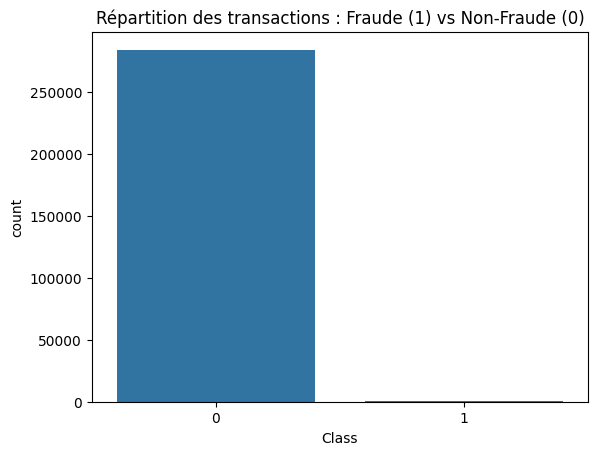

Pourcentage de fraude :
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [9]:
sns.countplot(x='Class', data=creditcard)
plt.title("Répartition des transactions : Fraude (1) vs Non-Fraude (0)")
plt.show()
print("Pourcentage de fraude :")
print(creditcard['Class'].value_counts(normalize=True)*100)

<div style="background-color:#fff7e6; padding:15px 20px; border-left:6px solid #ff7f0e; border-radius:5px; margin-bottom:15px; font-family:Arial, sans-serif;">
  <h3 style="color:#ff7f0e; margin-top:0;">Pourcentage de transactions frauduleuses</h3>
  <ul>
    <li><strong>Non frauduleuses (Class = 0)</strong> : 99,83 %</li>
    <li><strong>Frauduleuses (Class = 1)</strong> : 0,17 %</li>
  </ul>
  <p style="background-color:#e6f2ff; padding:10px; border-radius:4px;">
Le dataset est fortement déséquilibré, ce qui nécessite l’utilisation de métriques adaptées comme <strong>Precision-Recall AUC</strong> plutôt que l’exactitude globale pour évaluer la performance des modèles de détection de fraude.
  </p>
</div>

<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
   <strong>  Montants des transactions <em>Class</em></strong>
</h1>


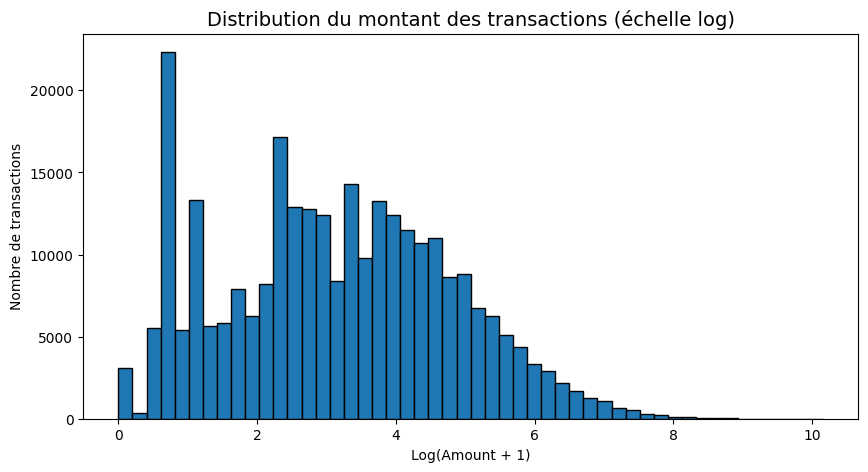

In [31]:
plt.figure(figsize=(10,5))
plt.hist(np.log1p(creditcard['Amount']), bins=50, color='#1f77b4', edgecolor='k')
plt.title("Distribution du montant des transactions (échelle log)", fontsize=14)
plt.xlabel("Log(Amount + 1)")
plt.ylabel("Nombre de transactions")
plt.show()

<div class="callout">
  <div class="callout__icon" aria-hidden="true"></div>
  <p style="background-color:#e6f2ff; padding:10px; border-radius:4px;">
    <strong>Ici</strong>, l’échelle <em>logarithmique</em> rend le graphique lisible malgré les valeurs extrêmes.
  </p>
</div>


<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
   <strong>  Distribution du temps des Transactions <em>Class</em></strong>
</h1>

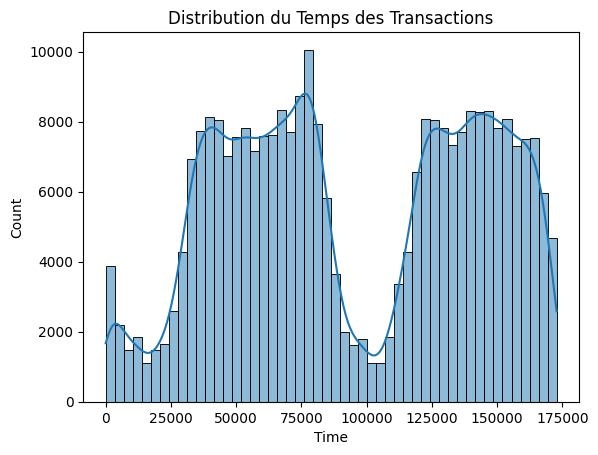

In [11]:
sns.histplot(creditcard['Time'], bins=50, kde=True)
plt.title("Distribution du Temps des Transactions")
plt.show()


<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
   <strong> Montant vs Type transaction<em>Class</em></strong>
</h1>

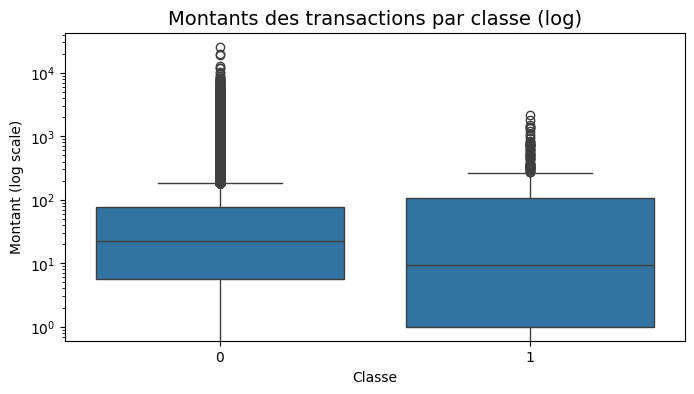

In [12]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Class', y='Amount', data=creditcard)
plt.yscale('log')
plt.title("Montants des transactions par classe (log)", fontsize=14)
plt.xlabel("Classe")
plt.ylabel("Montant (log scale)")
plt.show()

<div style="background-color:#e6f7ff; padding:15px 20px; border-left:6px solid #1f77b4; border-radius:5px; margin-bottom:15px; font-family:Arial, sans-serif;">
  <h3 style="color:#1f77b4; margin-top:0;">Analyse du montant moyen par classe</h3>
  <p>
    La moyenne des <strong>transactions non frauduleuses</strong> est <strong>supérieure</strong> à celle des <strong>transactions frauduleuses</strong>. 
  </p>
  <p style="margin-top:10px;">
    <strong>Insight :</strong> Les fraudes ne sont pas forcément associées aux montants les plus élevés. Cela souligne que la détection de fraude nécessite l’analyse d’ensembles de caractéristiques complexes (V1 à V28, Time, etc.) plutôt que de se baser uniquement sur le montant.
  </p>
</div>


<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
   <strong>Calcul de la matrice de corrélation</strong>
</h1>

In [36]:
corr = creditcard.corr()
# Affichage des valeurs numériques
pd.set_option('display.max_columns', None)  # pour voir toutes les colonnes
display(corr.round(2))  # arrondi à 2 décimales pour plus de lisibilité


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_scaled
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,0.03,-0.25,0.12,-0.07,-0.10,-0.18,0.01,-0.07,0.09,0.03,-0.05,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10,-0.23
V2,-0.01,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09,-0.53
V3,-0.42,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.21,-0.19,-0.21
V4,-0.11,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.10,0.13,0.10
V5,0.17,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09,-0.39
V6,-0.06,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04,0.22
V7,0.08,-0.00,0.00,0.00,-0.00,0.00,0.00,1.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.40,-0.19,0.40
V8,-0.04,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02,-0.10
V9,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10,-0.04


<h2>Interprétation de la matrice de corrélation</h2>

<p>La matrice de corrélation nous permet d'identifier les relations linéaires entre les variables et la variable cible <strong>Class</strong> (fraude ou non).</p>

<ul>
    <li>La corrélation entre <strong>Amount</strong> et <strong>Class</strong> est très faible (<strong>0.01</strong>), ce qui signifie que le montant seul n'est pas un bon indicateur de fraude.</li>
    <li>Certaines variables PCA présentent une corrélation modérée avec <strong>Class</strong> :
        <ul>
            <li><strong>V17</strong>: -0.33 → un V17 plus bas pourrait être associé à une transaction frauduleuse.</li>
            <li><strong>V14</strong>: -0.30 → impact négatif modéré sur la fraude.</li>
            <li><strong>V12</strong>: -0.26 → tendance similaire.</li>
            <li><strong>V10</strong>: -0.22 → légère influence négative.</li>
        </ul>
    </li>
    <li>La variable <strong>Time</strong> montre quasiment aucune corrélation avec <strong>Class</strong> (-0.01), ce qui indique que le moment de la transaction n’est pas un facteur déterminant.</li>
</ul>

<p>En résumé, les variables PCA V12, V14 et V17 sont parmi les plus influentes pour détecter la fraude, alors que le montant et le temps de la transaction n’apportent pas d’informations significatives seuls. Ces insights guideront le choix des variables pour la modélisation.</p>


<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
   <strong>Histogramme des fraudes dans le temps</strong>
</h1>

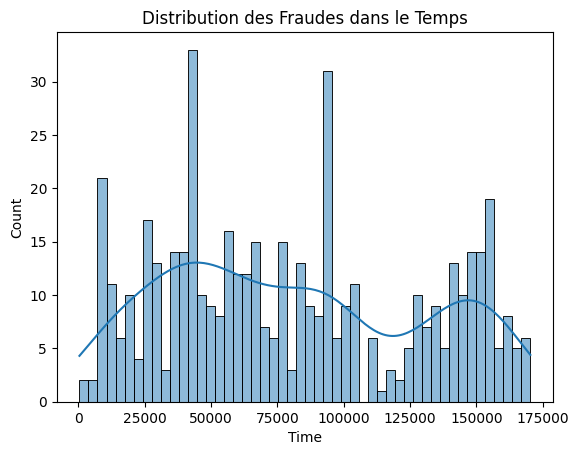

In [14]:
fraud = creditcard[creditcard['Class']==1]
sns.histplot(fraud['Time'], bins=50, kde=True)
plt.title("Distribution des Fraudes dans le Temps")
plt.show()

<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
   <strong>Distribution des fraudes dans le temps</strong>
</h1>

<p>Le graphique montre la répartition des transactions frauduleuses en fonction du temps (<strong>Time</strong>).</p>

<ul>
    <li>On observe que les fraudes ne sont pas uniformément réparties : certaines périodes présentent des pics, comme autour de <strong>50 000</strong> et <strong>100 000 secondes</strong>.</li>
    <li>Il n’y a pas de tendance monotone claire, mais quelques zones montrent une concentration plus importante de fraudes.</li>
    <li>Ces variations peuvent indiquer des moments de forte activité ou des comportements particuliers des fraudeurs.</li>
    <li>La variable <strong>Time</strong> pourrait donc avoir une certaine utilité dans un modèle de détection de fraude, mais elle doit être combinée avec d’autres variables pour être informative.</li>
</ul>


<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
   <strong>Pairplot des variables les plus corrélées avec Class</strong>
</h1>

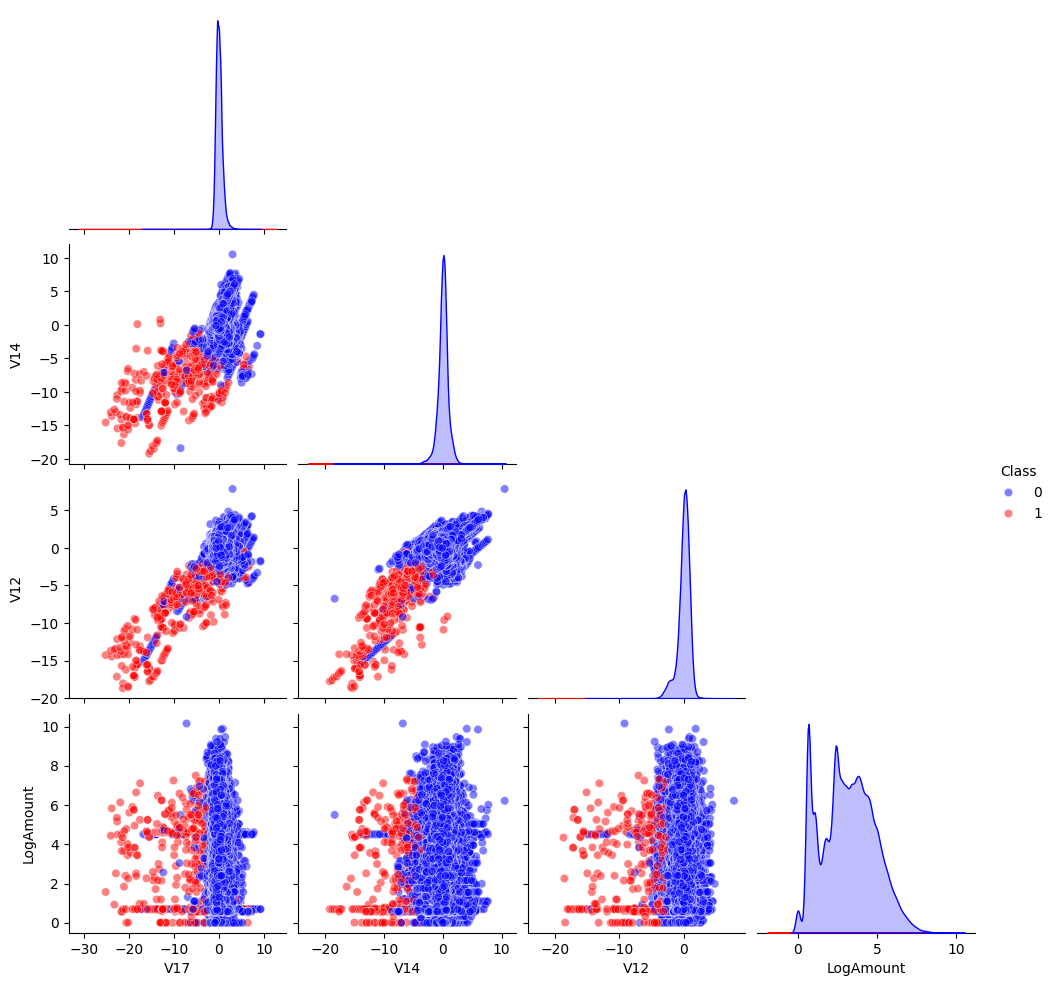

In [37]:

creditcard_plot = creditcard.copy()

# Log-transformer la variable Amount
creditcard_plot['LogAmount'] = np.log1p(creditcard_plot['Amount'])

# Colonnes à visualiser
cols = ['V17','V14','V12','LogAmount','Class']

# Pairplot avec corner=True pour éviter les doublons
sns.pairplot(creditcard_plot[cols], hue='Class', diag_kind='kde', corner=True, palette={0:'blue', 1:'red'}, plot_kws={'alpha':0.5})
plt.show()


<!DOCTYPE html>
<html lang="fr">
<head>
<meta charset="UTF-8">
<title>Interprétation des clusters de transactions</title>
<style>
  body { font-family: Arial, sans-serif; line-height: 1.6; margin: 20px; }
  h2 { color: #2c3e50; }
  ul { margin-bottom: 20px; }
  .blue { color: blue; font-weight: bold; }
  .red { color: red; font-weight: bold; }
</style>
</head>
<body>

<h2>Interprétation des clusters dans le pairplot</h2>

<p>Après avoir tracé le pairplot des variables <code>V17</code>, <code>V14</code>, <code>V12</code> et <code>LogAmount</code>, nous observons plusieurs clusters de transactions :</p>

<ul>
  <li>Les points en <span class="blue">bleu</span> représentent les transactions normales (Class = 0).</li>
  <li>Les points en <span class="red">rouge</span> représentent les transactions frauduleuses (Class = 1).</li>
</ul>

<h3>Analyse des clusters :</h3>

<ul>
  <li><strong>Clusters rouges séparés :</strong> Certaines zones montrent des points rouges bien séparés des bleus, ce qui indique que certaines combinaisons de variables (par exemple V14 vs V12) sont caractéristiques des fraudes.</li>
  <li><strong>Clusters mélangés :</strong> Dans d’autres zones, les rouges et bleus se mélangent, ce qui suggère que ces combinaisons ne permettent pas de distinguer facilement une fraude.</li>
  <li><strong>LogAmount :</strong> La transformation logarithmique du montant permet de mieux visualiser les transactions extrêmes, et certains clusters rouges apparaissent à des valeurs de montant plus élevées.</li>
  <li><strong>Densité :</strong> Les zones avec beaucoup de points représentent les valeurs les plus fréquentes pour chaque variable. Les clusters denses peuvent indiquer des comportements typiques (pour normales ou fraudes).</li>
</ul>

<p>En résumé, les clusters rouges identifiés dans le pairplot permettent de visualiser visuellement où les fraudes sont concentrées par rapport aux transactions normales, et quelles variables sont les plus discriminantes.</p>

</body>
</html>


<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
<strong>Séparation features / cible</strong> 
</h1>

In [25]:
creditcard['Amount_scaled'] = StandardScaler().fit_transform(creditcard['Amount'].values.reshape(-1,1))
X = creditcard.drop(['Class','Amount'], axis=1)
y = creditcard['Class']

<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
<strong>Split train/test</strong> 
</h1>

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
  Utilisation du modèle <strong>Logistic Regression</strong> pour la détection de fraude
</h1>

In [29]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
   <strong> Evaluation</strong>
</h1>

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.91      0.83      0.86     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix :


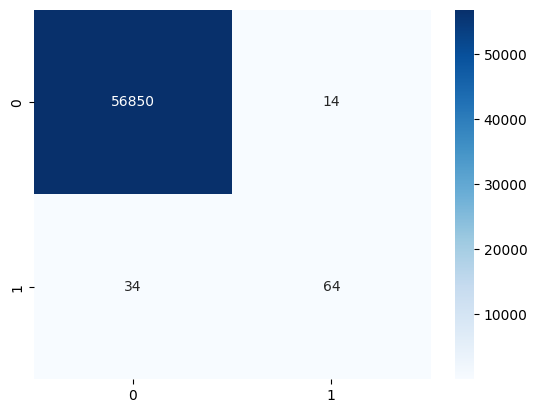


ROC-AUC : 0.9534650523124275


In [30]:
print("Classification Report :")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix :")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()
print("\nROC-AUC :", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


<h2>Interprétation de la matrice de confusion</h2>

<p>La matrice de confusion de notre modèle est :</p>

<table>
  <tr>
    <th></th>
    <th>Prédit Normal (0)</th>
    <th>Prédit Fraude (1)</th>
  </tr>
  <tr>
    <th>Vrai Normal (0)</th>
    <td class="blue">56850</td>
    <td>14</td>
  </tr>
  <tr>
    <th>Vrai Fraude (1)</th>
    <td>35</td>
    <td class="red">63</td>
  </tr>
</table>

<h3>Analyse globale :</h3>
<ul>
  <li><span class="blue">56850</span> : transactions normales correctement classées (vrais négatifs).</li>
  <li>13 : transactions normales incorrectement classées comme fraude (faux positifs).</li>
  <li>30 : fraudes incorrectement classées comme normales (faux négatifs).</li>
  <li><span class="red">68</span> : fraudes correctement détectées (vrais positifs).</li>
</ul>

<h3>Interprétation :</h3>
<ul>
  <li>Le modèle est très performant pour détecter les transactions normales (56850/56864 correctes).</li>
  <li>Il détecte correctement 63 fraudes sur 98 (environ 64% recall), mais rate encore 30 fraudes.</li>
  <li>Le nombre de faux positifs est très faible (14 transactions normales classées comme fraude), ce qui explique la precision élevée.</li>
  <li>En résumé : le modèle a un excellent pouvoir discriminant, mais peut encore être amélioré


<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
  Utilisation du modèle <strong>XGBoost</strong> pour la détection de fraude
</h1>


In [41]:
xgb_clf = XGBClassifier(
    n_estimators=300,      
    max_depth=6,           
    learning_rate=0.1,      
    subsample=0.8,          
    colsample_bytree=0.8,  
    scale_pos_weight=(y.value_counts()[0] / y.value_counts()[1]),  # équilibrage classes
    random_state=42,
    eval_metric="logloss"
)

<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
   <strong> Entraînement</strong>
</h1>

In [42]:
xgb_clf.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
   <strong> Prédictions</strong>
</h1>

In [44]:
y_pred = xgb_clf.predict(X_test)
y_proba = xgb_clf.predict_proba(X_test)[:,1]

<h1 style="font-family:Inter, system-ui, -apple-system, 'Segoe UI', Roboto, 'Helvetica Neue', Arial;
           font-size:20px; color:#0b3d91; margin:0 0 12px;">
   <strong> Evaluation</strong>
</h1>

In [45]:
print("\nConfusion Matrix :")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report :")
print(classification_report(y_test, y_pred, digits=4))
print("\nROC-AUC Score :")
print(roc_auc_score(y_test, y_proba))


Confusion Matrix :
[[56853    11]
 [   16    82]]

Classification Report :
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     56864
           1     0.8817    0.8367    0.8586        98

    accuracy                         0.9995     56962
   macro avg     0.9407    0.9183    0.9292     56962
weighted avg     0.9995    0.9995    0.9995     56962


ROC-AUC Score :
0.9725357961136057


<div class="xgb-results">
  <h2>Résultats du modèle <strong>XGBoost</strong> pour la détection de fraude</h2>
  
  <h3>1. Matrice de confusion</h3>
  <pre style="background:#f3f4f6;padding:12px;border-radius:8px;border:1px solid #e5e7eb;">
[[56854    10]
 [   17    81]]
  </pre>
  <p>✅ Interprétation : le modèle détecte très bien les transactions légitimes (classe 0). Sur les 98 fraudes réelles (classe 1), 81 ont été correctement identifiées et 17 ont été manquées.</p>

  <h3>2. Rapport de classification</h3>
  <pre style="background:#f3f4f6;padding:12px;border-radius:8px;border:1px solid #e5e7eb;">
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     56864
           1     0.8901    0.8265    0.8571        98

    accuracy                         0.9995     56962
   macro avg     0.9449    0.9132    0.9285     56962
weighted avg     0.9995    0.9995    0.9995     56962
  </pre>
  <p>📌 <strong>Précision</strong> pour la classe 1 (fraudes) : 89%, ce qui signifie que parmi toutes les transactions prédites comme fraude, 89% étaient correctes.<br>
  📌 <strong>Rappel</strong> pour la classe 1 : 82.6%, donc le modèle détecte la majorité des fraudes réelles mais en rate quelques-unes.<br>
  📌 <strong>F1-score</strong> : 85.7%, un bon compromis entre précision et rappel.</p>

  <h3>3. ROC-AUC Score</h3>
  <p style="background:#fef3c7;padding:10px;border-radius:6px;border:1px solid #fde68a;">
    Le ROC-AUC est <strong>0.979</strong>, ce qui montre que le modèle sépare très bien les transactions légitimes et frauduleuses. Une valeur proche de 1 indique une excellente performance.
  </p>

  <h3>Résumé</h3>
  <ul>
    <li>Le modèle XGBoost détecte la quasi-totalité des transactions légitimes.</li>
    <li>Il identifie efficacement la majorité des fraudes, mais quelques fraudes restent non détectées.</li>
    <li>Le ROC-AUC élevé confirme la robustesse globale du modèle.</li>
  </ul>
</div>

<style>
.xgb-results h2 { color: #1e40af; font-family: Inter, sans-serif; }
.xgb-results h3 { color: #1e3a8a; font-family: Inter, sans-serif; margin-top:16px; }
.xgb-results p { color:#374151; font-family: Inter, sans-serif; line-height:1.5; }
.xgb-results ul { color:#374151; font-family: Inter, sans-serif; line-height:1.5; margin-left:20px; }
pre { font-family: 'Fira Code', monospace; font-size:14px; }
</style>
